# Data description

(Data is from a Kaggle competition: https://www.kaggle.com/airbnb/seattle/home)

In this dataset, it mainly includes three files: listings, including full descriptions and average review score; reviews, including unique id for each reviewers and detailed comments; calendar, including listing id and the price and availability for that day.

### In this notebook, I am going to explore a few question about the price:
### - Which neighborhoods have the most rooms? And which neighborhoods are cheaper to live?
### - The change of occupancy rate with time in a week?
### - The change of the average prices of Airbnb with time in a year/week?

In [118]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Reading raw data

In [131]:
listings=pd.read_csv('../dataset/listings.csv')
reviews=pd.read_csv('../dataset/reviews.csv')
calendar=pd.read_csv('../dataset/calendar.csv')

In [121]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [122]:
print(listings.iloc[1])

id                                                                             953595
listing_url                                       https://www.airbnb.com/rooms/953595
scrape_id                                                              20160104002432
last_scraped                                                               2016-01-04
name                                               Bright & Airy Queen Anne Apartment
summary                             Chemically sensitive? We've removed the irrita...
space                               Beautiful, hypoallergenic apartment in an extr...
description                         Chemically sensitive? We've removed the irrita...
experiences_offered                                                              none
neighborhood_overview               Queen Anne is a wonderful, truly functional vi...
notes                               What's up with the free pillows?  Our home was...
transit                             Convenient bus sto

In [123]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [132]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


# The change of the average prices of Airbnb with time in a year 


In [136]:
rooms_price=calendar.copy()

In [137]:
#extract date information

rooms_price['dates']=pd.to_datetime(rooms_price.date)
rooms_price["month"]=rooms_price['dates'].dt.month
rooms_price['quarter']=rooms_price['dates'].dt.quarter
rooms_price['weekday']=rooms_price['dates'].dt.weekday+1  # pluse 1 on the results, the number indicates the weekday ex, 1->Monday 2->Tuesday....
rooms_price['dayofweek']=rooms_price['dates'].dt.dayofweek+1 # pluse 1 on the results, the number indicates the weekday ex, 1->Monday 2->Tuesday....
rooms_price['weekofyear']=rooms_price['dates'].dt.weekofyear
rooms_price['dayofyear']=rooms_price['dates'].dt.dayofyear

In [140]:
#room not available
room_not_available=rooms_price[rooms_price.available=="f"]

# room is avaliable
# change the price from strings to float
def str2float(x):
    x=x.replace('$',"").replace(",","")
    return eval(x)
rooms_available_price=rooms_price[rooms_price.available=="t"]
rooms_available_price.price=rooms_available_price.price.apply(str2float)
rooms_available_price.price=rooms_available_price.price.astype("float64")

In [141]:
def plot_change_of_price(rooms_available_price=rooms_available_price,by="dates"):
    """
    Function:
        Plot the change of the average prices based on th group by results.
    INPUT: 
        room_availabel_price--dataframe
        by--str, name of the column to group by    
    """
    average_price=rooms_available_price.groupby(by)["price"].mean()
    plt.figure(figsize=(10,7))
    plt.plot(average_price)
    plt.xlabel(by)
    plt.ylabel("Average price $")
    plt.grid()
    plt.show()

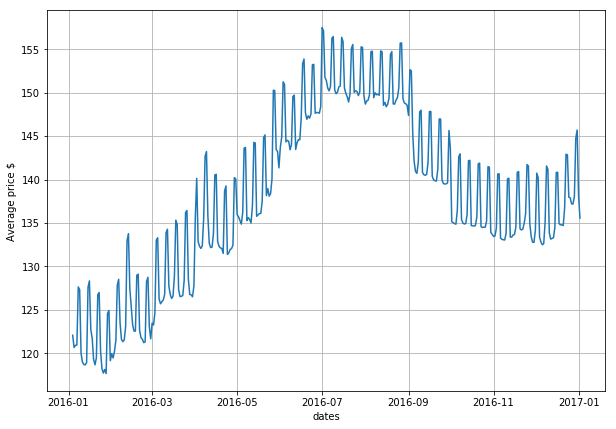

In [142]:
plot_change_of_price(by="dates")

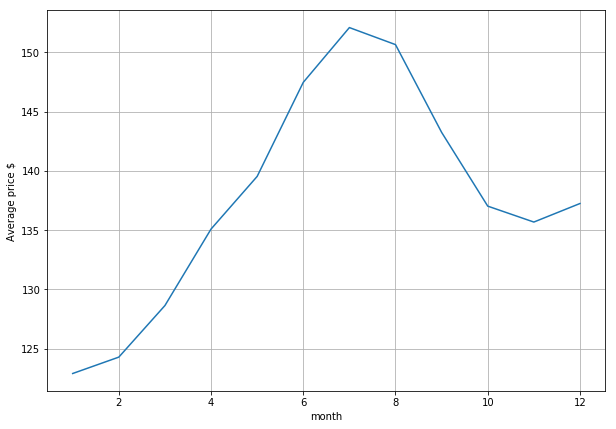

In [143]:
plot_change_of_price(by="month")

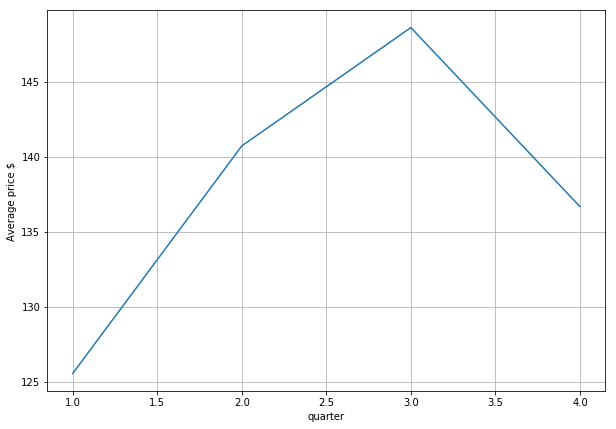

In [144]:
plot_change_of_price(by="quarter")

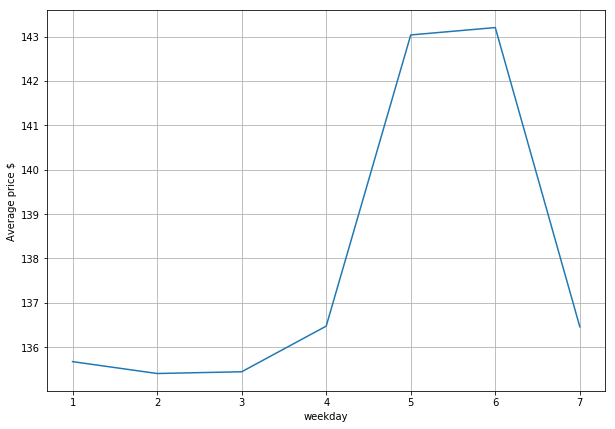

In [145]:
plot_change_of_price(by="weekday")

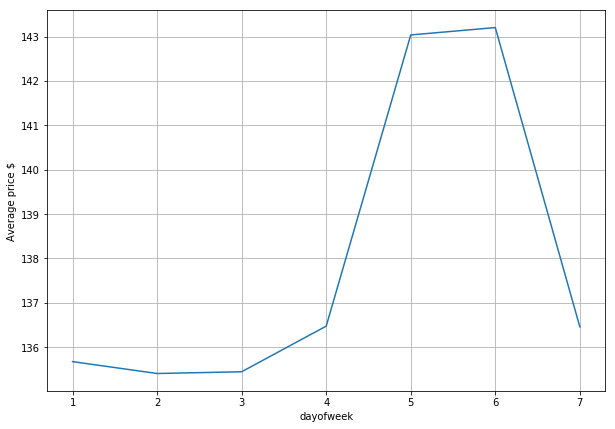

In [146]:
plot_change_of_price(by="dayofweek")

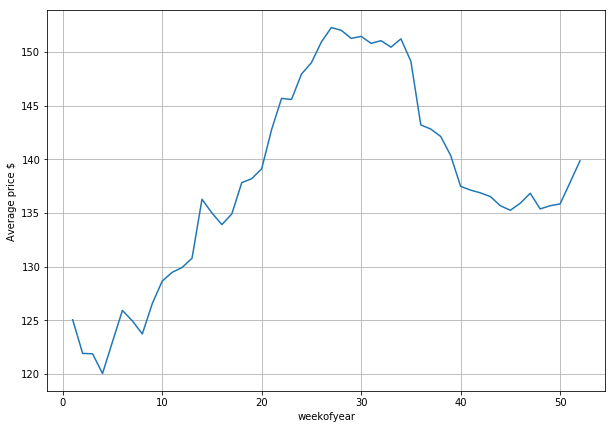

In [147]:
plot_change_of_price(by="weekofyear")

# The change of occupancy rate over time.

In [ ]:
#when lots of listings are available, it means it is not busy that day. 
#when lost of listings are not available, it means it is a busy day.

In [169]:
listing_rooms_all=rooms_price.groupby("dates")["listing_id"].count()
listing_rooms_not_available=room_not_available.groupby("dates")["listing_id"].count()

In [174]:
listing_rooms_all.head()

dates
2016-01-04    3818
2016-01-05    3818
2016-01-06    3818
2016-01-07    3818
2016-01-08    3818
Freq: D, Name: listing_id, dtype: int64

In [177]:
room_count=pd.DataFrame([listing_rooms_all,listing_rooms_not_available]).T
room_count.columns=["allCount","occupy"]
room_count["occupy_rate"]=room_count.occupy/room_count.allCount
room_count.head()

,allCount,occupy,occupy_rate
dates,,,
2016-01-04,3818,2083,0.545574
2016-01-05,3818,1951,0.511001
2016-01-06,3818,1992,0.521739
2016-01-07,3818,2042,0.534835
2016-01-08,3818,2036,0.533263


In [180]:
room_count['dates']=pd.to_datetime(room_count.index)
room_count["month"]=room_count['dates'].dt.month
room_count['quarter']=room_count['dates'].dt.quarter
room_count['weekday']=room_count['dates'].dt.weekday+1  # pluse 1 on the results, the number indicates the weekday ex, 1->Monday 2->Tuesday....
room_count['dayofweek']=room_count['dates'].dt.dayofweek+1 # pluse 1 on the results, the number indicates the weekday ex, 1->Monday 2->Tuesday....
room_count['weekofyear']=room_count['dates'].dt.weekofyear
room_count['dayofyear']=room_count['dates'].dt.dayofyear

In [224]:
def plot_change_of_occupy_rate(data=room_count,by="dates"):
    occupy_rate=data.groupby(by)["occupy_rate"].mean()
    plt.figure(figsize=(10,7))
    plt.plot(occupy_rate)
    plt.xlabel(by)
    plt.ylabel("occupy_rate")
    plt.grid()
    plt.show()

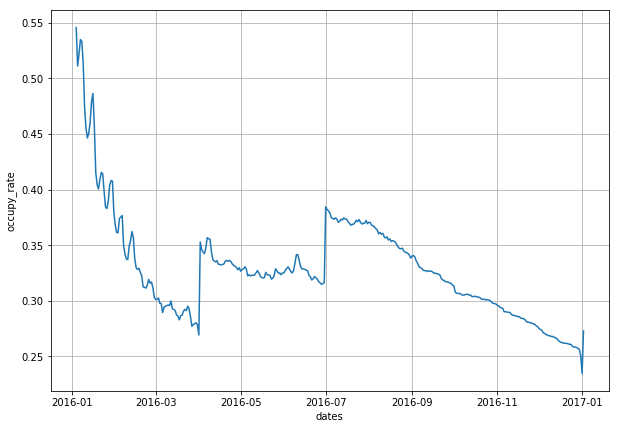

In [226]:
plot_change_of_occupy_rate(data=room_count,by="dates")

#### The results don't make sense. 1. there is a jump in April and July. 2 We expect the occupy rate should be a periodic function by year. However the values have a huge difference between January 2016 and 2017.

#### The possible reason for this results: When some new rooms add into the listings in the later time of the year, they create these rooms all over the year in the data set and label them as "not available" before the date when the new rooms get into the market. 

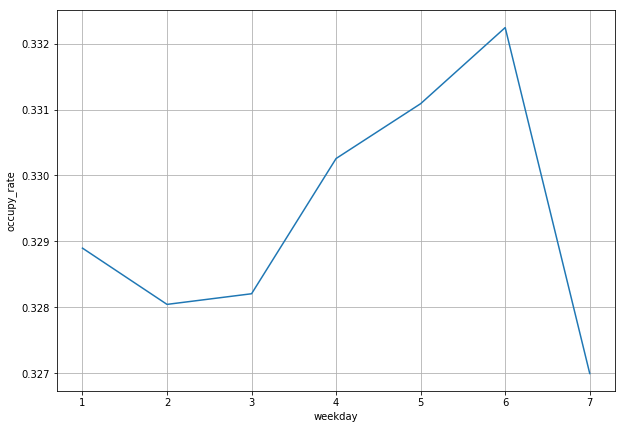

In [225]:
plot_change_of_occupy_rate(data=room_count,by="weekday")

# Where are the rooms with the cheapest price?

In [228]:
#to answer this question, we uset the dataset of "listings"
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [244]:
listings["price_eval"]=listings.price.apply(str2float)
listings_dropna=listings.dropna(subset=['host_neighbourhood'])

In [254]:
neighbourhood_rank=listings_dropna.groupby("host_neighbourhood")["price_eval"].mean()
neighbourhood_count=listings_dropna.groupby("host_neighbourhood")["price_eval"].count()

In [249]:
listings_dropna.price_eval.mean()

128.72740193291642

In [264]:
neigh_price=pd.concat([neighbourhood_rank, neighbourhood_count], axis=1).reset_index()
neigh_price.columns=['neighbourhood','avg_price',"num"]

In [265]:
#only choose the neighbourhood with more than 2 listings
neigh_price.head()

,neighbourhood,avg_price,num
0,Alki,182.090909,22
1,Anaheim,173.285714,7
2,Arbor Heights,118.000000,3
3,Atlantic,112.714286,49
4,Baldwin Hills,75.000000,1


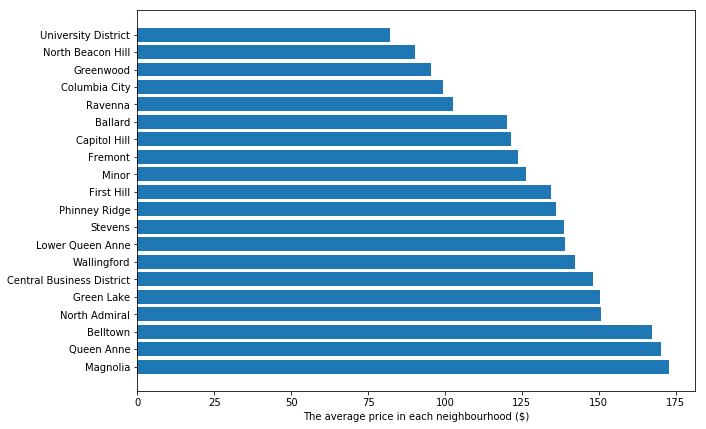

In [305]:
popular_neigh_price=neigh_price[neigh_price["num"]>50].sort_values("avg_price",ascending=False)
plt.figure(figsize=(10,7))
plt.barh(popular_neigh_price.neighbourhood.values,popular_neigh_price["avg_price"].values,)
#plt.xticks(rotation=90)
plt.xlabel("The average price in each neighbourhood ($)")
plt.show()

In [307]:
popular_neigh_price.sort_values("avg_price")

,neighbourhood,avg_price,num
93,University District,82.112500,80
67,North Beacon Hill,90.396040,101
33,Greenwood,95.450000,80
18,Columbia City,99.360656,61
80,Ravenna,102.580000,100
5,Ballard,120.104762,210
13,Capitol Hill,121.325926,405
28,Fremont,123.761905,147
61,Minor,126.350785,191
26,First Hill,134.470588,85


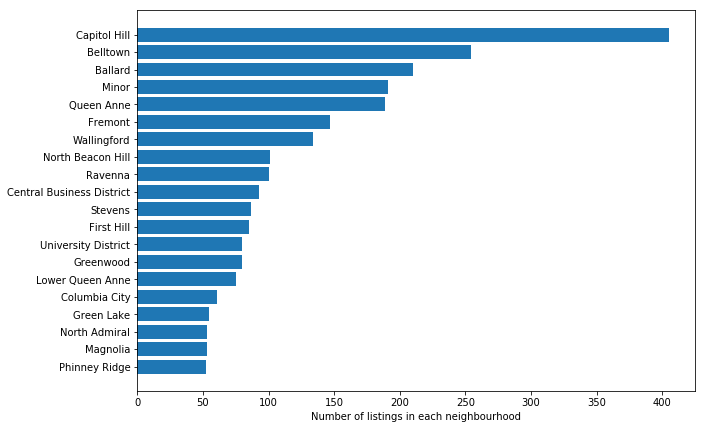

In [302]:
popular_neigh_rank=neigh_price.sort_values("num",ascending=False)
plt.figure(figsize=(10,7))
plt.barh(popular_neigh_rank.neighbourhood.values[:20][::-1],popular_neigh_rank["num"].values[:20][::-1],)
plt.xlabel("Number of listings in each neighbourhood")
#plt.xticks(rotation=90)
plt.show()

In [304]:
popular_neigh_rank

,neighbourhood,avg_price,num
13,Capitol Hill,121.325926,405
6,Belltown,167.220472,254
5,Ballard,120.104762,210
61,Minor,126.350785,191
78,Queen Anne,170.264550,189
28,Fremont,123.761905,147
97,Wallingford,142.320896,134
67,North Beacon Hill,90.396040,101
80,Ravenna,102.580000,100
15,Central Business District,148.053763,93
